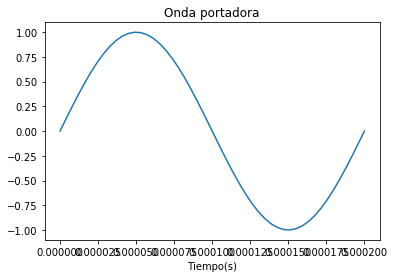

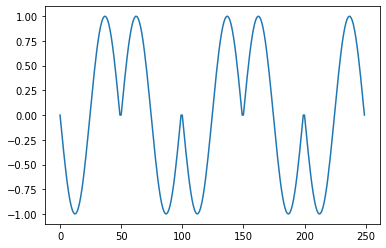

Potencia promedio en watts: 0.4900009800019598


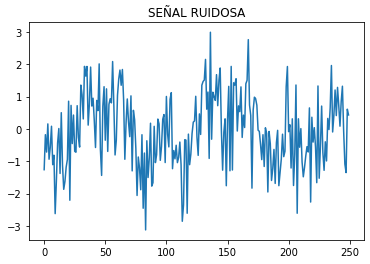

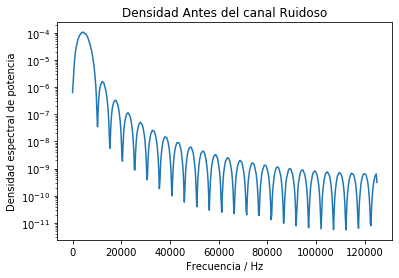

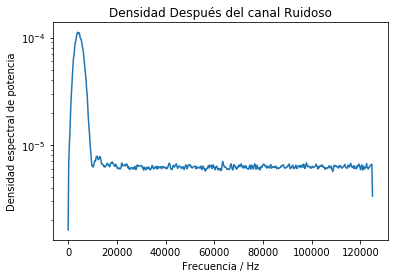

Hay un total de 17.0 errores en 10000 bits para una tasa de error de 0.0017 para el SNR de -2


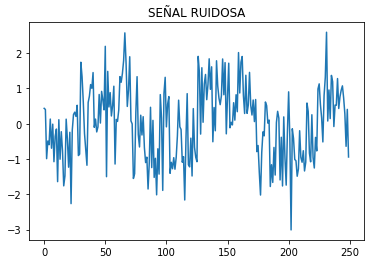

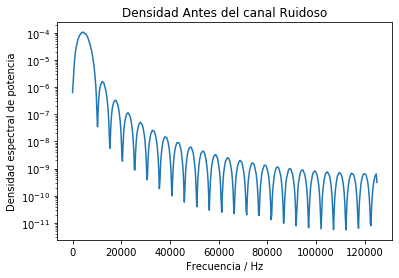

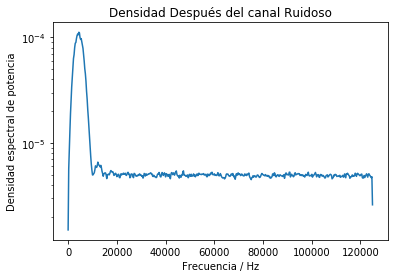

Hay un total de 4.0 errores en 10000 bits para una tasa de error de 0.0004 para el SNR de -1


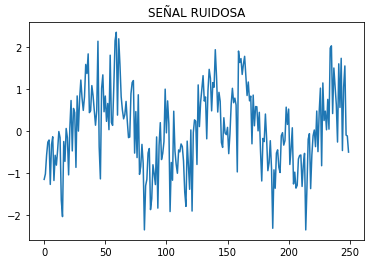

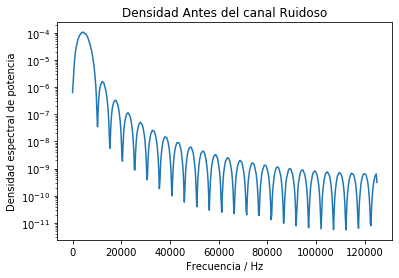

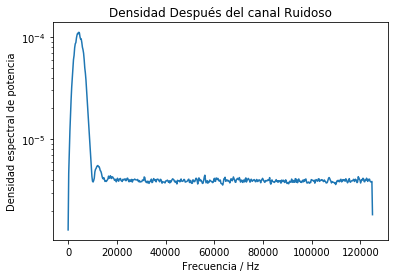

Hay un total de 0.0 errores en 10000 bits para una tasa de error de 0.0 para el SNR de 0


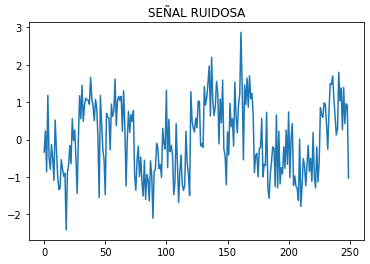

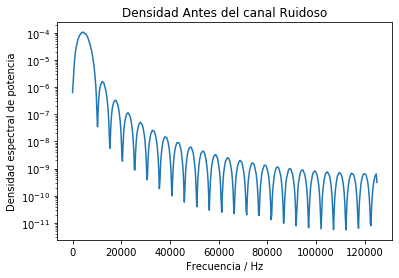

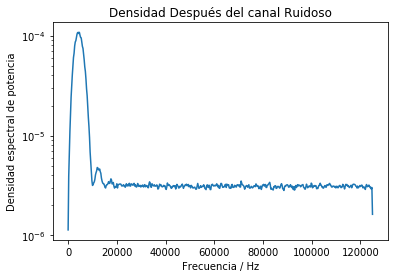

Hay un total de 0.0 errores en 10000 bits para una tasa de error de 0.0 para el SNR de 1


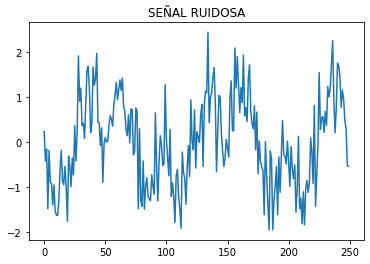

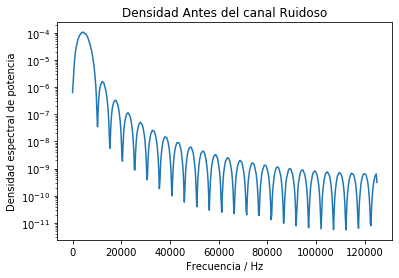

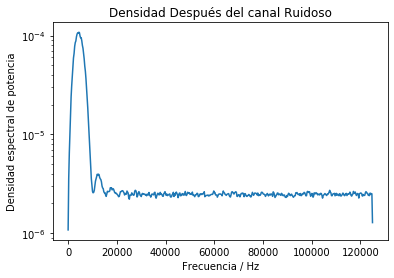

Hay un total de 0.0 errores en 10000 bits para una tasa de error de 0.0 para el SNR de 2


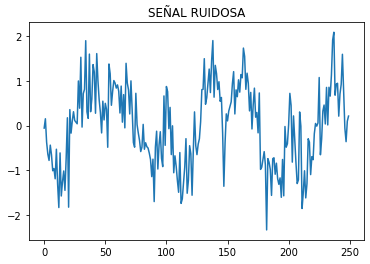

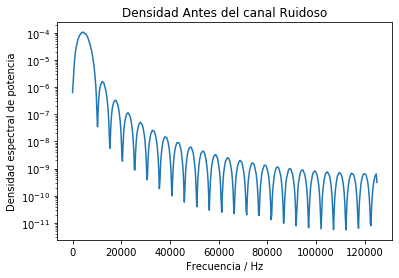

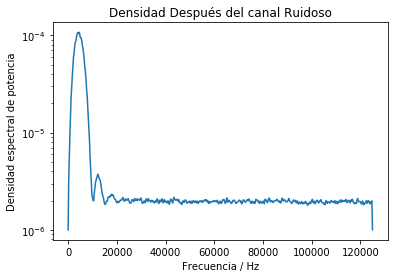

Hay un total de 0.0 errores en 10000 bits para una tasa de error de 0.0 para el SNR de 3


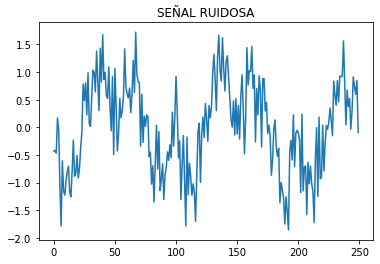

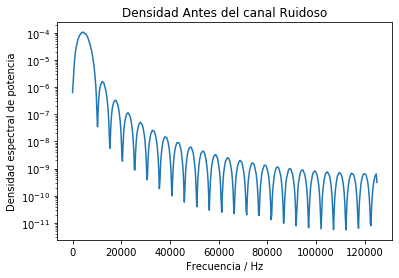

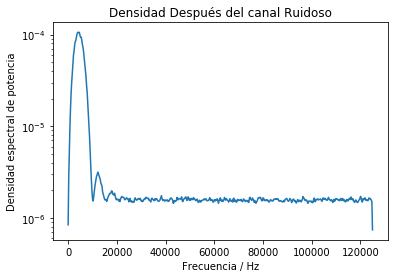

Hay un total de 0.0 errores en 10000 bits para una tasa de error de 0.0 para el SNR de 4


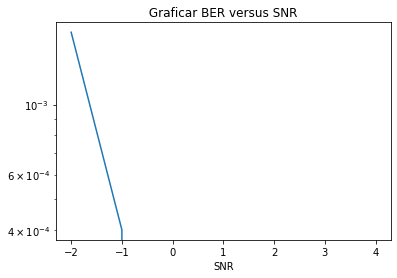

In [5]:
#Antes de iniciar con el programa, creo las librerías a utilizar, como se muestra a continuación 

import pandas as pd
import numpy as np
from scipy import stats
from scipy import signal
from scipy import integrate
import matplotlib.pyplot as plt

#Realizo la llamada de los datos
misbits = pd.read_csv('bits10k.csv',names=['A'],header=None)
datos=misbits['A']

N=10000
#Parte 1.
#Crear un esquema de modulación BPSK para los bits presentados.
#Esto implica asignar una forma de onda sinusoidal normalizada (amplitud unitaria) para cada bit 


#frecuencia de portadora 5 kHz y N=10 kbits
f=5000 #Hz

#Periodo
T=1/f 

#Numero de Puntos de muestreo
P=50

#Puntos de muestreo de cada periodo
tp=np.linspace(0,T,P)

#forma de onda de la portadora
seno =np.sin(2*np.pi*f*tp)

#Visualización de la onda portadora
plt.plot(tp,seno)
plt.xlabel('Tiempo(s)')
plt.title('Onda portadora')
plt.figure(1)
plt.savefig('Portadora.png')

#frecuencia de muestreo
fs= P/T

#Tiempo  para toda la señal
t = np.linspace(0,N*T,N*P)

#Inicializador
senal= np.zeros(t.shape)

#Se crea la señal modulada BPSK
for i,b in enumerate(datos):
    if b==1:
        senal[i*P:(i+1)*P]=seno   
    else:
        senal[i*P:(i+1)*P]=-seno    #En la señal modulada BPSK, se toma en cuenta un seno negativo en la función 
           
#Visualizacion de la señal modulada 
plt.figure(2)
plt.plot(senal[0:5*P])
plt.show()


#PARTE 2 

#Calcular la potencia promedio de la señal modulada generada.

#potencia instantanea 
Pinstantánea=senal**2

#potencia promedio
Promedio=integrate.trapz(Pinstantánea,t)/(N*T)
print('Potencia promedio:', Promedio)


#PARTE 3 generacion de un canal ruidoso  
#Simular un canal ruidoso del tipo AWGN (ruido aditivo blanco gaussiano) 
#Con una relación señal a ruido (SNR) desde -2 hasta 5 dB

#En este caso, por sugerencia del profesor se cambia el rango, para observar distintas cantidades de errores en la parte 5 de la tarea.


# Relación señal-a-ruido deseada
SNR = range(-2,5)  #Rango a estudiar
BER=[]
for n in SNR:
    # Potencia del ruido para SNR y potencia de la señal dadas
    Pn = Promedio / (10**(n / 10))

    # Desviación estándar del ruido
    sigma = np.sqrt(Pn)

    # Crear ruido (Pn = sigma^2)
    ruido = np.random.normal(0, sigma, senal.shape)

    # Simular "el canal": señal recibida
    Sruidosa = senal + ruido

    # Visualización de los primeros bits recibidos
    pb = 5 #primeros bits 
    plt.figure(3)
    plt.title("SEÑAL RUIDOSA")
    plt.plot(Sruidosa[0:pb*P])
    plt.show()

   
    #PARTE 4 
    
    #Graficar la densidad espectral de potencia de la señal con el método de Welch (SciPy)
    #Antes y después del canal ruidoso.
    
    
     # Antes del canal ruidoso
        
    frecuencia, PSD = signal.welch(senal, fs, nperseg=1024)
    plt.figure(4)
   
    plt.semilogy(frecuencia, PSD)
    plt.title("Densidad Antes del canal Ruidoso")
    plt.xlabel('Frecuencia / Hz')
    plt.ylabel("Densidad espectral de potencia")
    plt.show()
  
    # Después del canal ruidoso
    
    frecuencia, PSD = signal.welch(Sruidosa, fs, nperseg=1024)
    plt.figure(5)
    plt.title("Densidad Después del canal Ruidoso")
    plt.semilogy(frecuencia, PSD)
    plt.xlabel('Frecuencia / Hz')
    plt.ylabel("Densidad espectral de potencia")
    plt.show()


   
    #PARTE 5
    #Demodular y decodificar la señal 
    #Hacer un conteo de la tasa de error de bits (BER, bit error rate) para cada nivel SNR.
    #En esta parte del código, se visualizan los diferentes errores que existe en el rango descrito en la parte 3
    #Sin embargo para valores mayores a 1, el error es de 0(como se puede observar en las gráficas)
    #Esto se debe gracias a que las señales moduladas de BSPK, son bastantes ROBUSTAS.

    
    # Pseudo-energía de la onda original (esta es suma, no integral)
    Es = np.sum(seno**2)
    # Inicialización del vector de bits recibidos
    bitsSruidosa =np.zeros(datos.shape)

    # Decodificación de la señal por detección de energía
    for k, b in enumerate(datos):
        Ep = np.sum(Sruidosa[k*P:(k+1)*P] * seno)
        if Ep > Es/2:
            bitsSruidosa[k] = 1
        else:
            bitsSruidosa[] = 0  
            
    error = np.sum(np.abs(datos - bitsSruidosa))
    BER.append(error/N)
    print('Hay un total de {} errores en {} bits para una tasa de error de {} para el SNR de {}'.format(error, N, error/N, n))


#PARTE 6
#Graficar BER versus SNR.

plt.semilogy(SNR, BER)

plt.title(" Graficar BER versus SNR ")
plt.xlabel('SNR')
#plt.ylabel("BER")
plt.show()
